<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/Datasets/spam.csv"

In [3]:
import pandas as pd

# Working around the encoding error while loading the dataset
encodings = ["utf-8", "latin1", "iso-8859-1", "utf-16"]

for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print("File read successfully using encoding:", encoding)
        break  # Exit the loop if the file is read successfully
    except UnicodeDecodeError:
        print("Failed to read with encoding:", encoding)

Failed to read with encoding: utf-8
File read successfully using encoding: latin1


In [4]:
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [5]:
# Renaming the columns
data = data.rename(columns={'v1': 'label', 'v2': 'message'})

In [6]:
# Viewing the data
data.head

<bound method NDFrame.head of      label                                            message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [7]:
# Count of ham
ham_count = data['label'].str.contains('ham').sum()
print("The number of ham messages:", ham_count)

# Count of spam
spam_count = data['label'].str.contains('spam').sum()
print("The number of spam messages:", spam_count)

# Percentage ham
per_ham = round(ham_count/(spam_count+ham_count) * 100, 2)
print("Percentage of ham:", per_ham, "\n", "Percentage of spam:", round(100 - per_ham, 2))

The number of ham messages: 4825
The number of spam messages: 747
Percentage of ham: 86.59 
 Percentage of spam: 13.41


# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

**Answer**

When there is a class imbalance, using accuracy is not a good measure to determine model performance. In such situations, the F1 score should be used to evaluate how well a model can classify data. The F1 score is the harmonic mean of precision and recall and is not impacted by imbalanced classes, making it better-suited for the dataset.



# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**


# Data Exploration and Cleaning

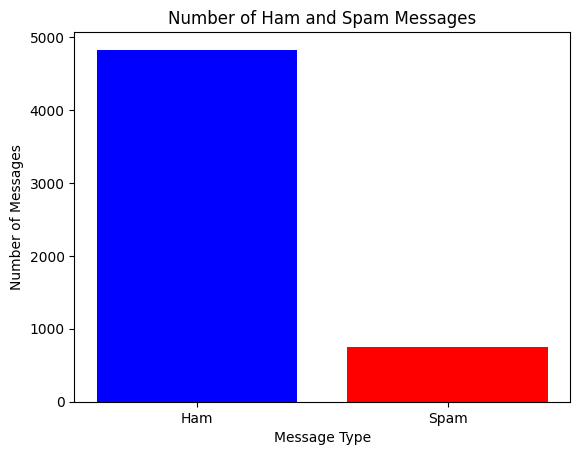

In [8]:
# Let's visualize the data
import matplotlib.pyplot as plt

# Number of ham messages
num_ham = 4825

# Number of spam messages
num_spam = 747

# Labels for the bar plot
labels = ['Ham', 'Spam']

# Heights of the bars
heights = [ham_count, spam_count]

# Create the bar plot
plt.bar(labels, heights, color=['blue', 'red'])

# Add title and labels
plt.title('Number of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')

# Show the plot
plt.show()

In [9]:
# Checking what columns we have
data.columns

Index(['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
# Dropping unnecessary columns
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [11]:
# Inspecting the dataframe
data.columns

Index(['label', 'message'], dtype='object')

In [12]:
# Converting to lower case
data['message'] = data['message'].str.lower()

In [13]:
# Sub-sampling the data
small_data = pd.DataFrame(data.sample(frac = 0.10, random_state = 12))
print(small_data.head)

print(small_data.shape, data.shape)

<bound method NDFrame.head of      label                                            message
3134   ham  wat makes some people dearer is not just de ha...
5037   ham  thanks for being there for me just to talk to ...
785    ham  she was supposed to be but couldn't make it, s...
730   spam  email alertfrom: jeri stewartsize: 2kbsubject:...
355    ham  thank you for calling.forgot to say happy onam...
...    ...                                                ...
3490   ham                                                ok.
5261   ham  i absolutely love south park! i only recently ...
1285   ham           just wondering, the others just took off
4500   ham                              so wat's da decision?
1638   ham              great comedy..cant stop laughing da:)

[557 rows x 2 columns]>
(557, 2) (5572, 2)


In [49]:
# Replace with binary
data['label'] = data['label'].replace({'ham': 1, 'spam': 0})
data.head

<bound method NDFrame.head of       label                                            message
0         1  go until jurong point, crazy.. available only ...
1         1                      ok lar... joking wif u oni...
2         0  free entry in 2 a wkly comp to win fa cup fina...
3         1  u dun say so early hor... u c already then say...
4         1  nah i don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      0  this is the 2nd time we have tried 2 contact u...
5568      1              will ì_ b going to esplanade fr home?
5569      1  pity, * was in mood for that. so...any other s...
5570      1  the guy did some bitching but i acted like i'd...
5571      1                         rofl. its true to its name

[5572 rows x 2 columns]>

# Sparse Embeddings

In [50]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import spacy         # For NLP preprocessing

# Import required nltk packages
import nltk
nltk.download('stopwords')  # Download the stopwords corpus
from nltk.corpus import stopwords as nltk_stopwords  # Stopwords corpus

# Import tweet tokenizer from nltk
from nltk.tokenize import TweetTokenizer

# Import CountVectorizer and TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import pathlib for managing file paths
from pathlib import Path

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Loading spaCy
nlp = spacy.load('en_core_web_sm')

In [52]:
# Stop words
nltk_stop_words = nltk_stopwords.words('english')

In [53]:
# tfidf vectorizer
tfidf_vectorizer = tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,  # Adjust the number of features as per your dataset size
    min_df=5,           # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.8,         # Ignore terms that have a document frequency strictly higher than the given threshold
    ngram_range=(1, 2), # Unigrams and bigrams
    stop_words='english'
)
tfidf_vectors = tfidf_vectorizer.fit_transform(small_data['message'])
print(f'tfidf vectors in array (dense) format\n')
print(tfidf_vectors.toarray())
print(f'\nThe shape of the tfidf vectors is : {tfidf_vectors.toarray().shape}')

tfidf vectors in array (dense) format

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The shape of the tfidf vectors is : (557, 166)


In [54]:
tfidf_vectorizer.vocabulary_

{'wat': 150,
 'people': 106,
 'just': 65,
 'happiness': 56,
 'feel': 42,
 'meet': 83,
 'pain': 105,
 'miss': 87,
 'thanks': 131,
 'dear': 28,
 'having': 58,
 'make': 82,
 'cost': 21,
 'thank': 130,
 'calling': 10,
 'say': 117,
 'happy': 57,
 'fine': 44,
 'come': 17,
 'getting': 47,
 'free': 45,
 'time': 135,
 'want': 149,
 'got': 50,
 'yeah': 161,
 'tell': 128,
 'okay': 102,
 'ringtone': 115,
 'order': 104,
 'number': 98,
 'mobile': 88,
 '50': 3,
 'customer': 23,
 'services': 121,
 'customer services': 24,
 'went': 153,
 'morning': 91,
 'day': 26,
 'yup': 164,
 'hey': 60,
 'ask': 5,
 'leave': 71,
 'don': 35,
 'll': 76,
 'buy': 9,
 'send': 118,
 'wont': 157,
 'til': 134,
 'like': 75,
 'lt': 80,
 'gt': 53,
 'lt gt': 81,
 'try': 141,
 'later': 69,
 'thing': 132,
 'tomo': 138,
 'pick': 108,
 'good': 49,
 'ok': 101,
 'double': 37,
 'da': 25,
 'said': 116,
 'nice': 95,
 'oh': 100,
 'bed': 6,
 'year': 162,
 'did': 29,
 'know': 67,
 'doing': 34,
 'chance': 14,
 'let': 72,
 'love': 79,
 'amp': 

In [55]:
# Calculate inverse document frequency for each feature (word)
term_idf = tfidf_vectorizer.idf_
term_idf

array([5.37844881, 5.53259949, 5.53259949, 5.37844881, 4.83945231,
       5.24491742, 5.53259949, 5.53259949, 5.37844881, 5.24491742,
       5.53259949, 5.24491742, 5.53259949, 5.02177387, 5.53259949,
       5.24491742, 5.24491742, 4.10548314, 5.37844881, 4.92646369,
       5.02177387, 5.24491742, 5.53259949, 5.24491742, 5.53259949,
       4.61630876, 4.23331651, 5.02177387, 4.27983652, 5.37844881,
       5.37844881, 5.53259949, 5.53259949, 5.53259949, 5.24491742,
       4.61630876, 5.12713439, 5.53259949, 5.37844881, 5.53259949,
       5.53259949, 5.53259949, 5.24491742, 5.53259949, 5.37844881,
       4.55177024, 5.24491742, 5.12713439, 4.14630513, 4.06626242,
       4.18886475, 5.53259949, 4.7594096 , 3.79799844, 5.24491742,
       5.53259949, 5.53259949, 5.12713439, 5.12713439, 5.53259949,
       4.83945231, 4.83945231, 4.61630876, 5.02177387, 5.37844881,
       3.63547951, 5.37844881, 4.23331651, 5.37844881, 4.92646369,
       5.53259949, 5.37844881, 4.92646369, 5.53259949, 5.37844

In [56]:
# Importing libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb

In [75]:
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.head

<bound method NDFrame.head of       label                                            message
1978      1  no i'm in the same boat. still here at my moms...
3989      0  (bank of granite issues strong-buy) explosive ...
3935      1     they r giving a second chance to rahul dengra.
4078      1     o i played smash bros  &lt;#&gt;  religiously.
4086      0  private! your 2003 account statement for 07973...
...     ...                                                ...
3772      1  i came hostel. i m going to sleep. plz call me...
5191      1                             sorry, i'll call later
5226      1      prabha..i'm soryda..realy..frm heart i'm sory
5390      1                         nt joking seriously i told
860       1                in work now. going have in few min.

[4457 rows x 2 columns]>

In [76]:
# Define pipeline 1
pipeline_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier())
])

# Define the parameter grid
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [100, 200, 300]
}

# Create randomized search
random_search_1 = RandomizedSearchCV(estimator=pipeline_1, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)


In [77]:
# Define pipeline 2
pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'tfidf__max_features': [1000, 2000, 3000],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create randomized search
random_search_2 = RandomizedSearchCV(estimator=pipeline_2, param_distributions=param_grid_rf, n_iter=10, cv=5, random_state=42)

# Define pipeline 3
pipeline_3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Randomized search
random_search_3 = RandomizedSearchCV(estimator=pipeline_3, param_distributions=param_grid_rf, n_iter=10, cv=5, random_state=42)


In [78]:
# Evaluate pipeline 1
# Fit the randomized search to find the best model
random_search_1.fit(train_data['message'], train_data['label'])

# Get the best model from the random search
best_model_1 = random_search_1.best_estimator_

# Make predictions using the best model
predictions_1 = best_model_1.predict(test_data['message'])

# Now you can evaluate the predictions using the appropriate evaluation metrics
precision_1 = precision_score(test_data['label'], predictions_1, pos_label=0)
recall_1 = recall_score(test_data['label'], predictions_1, pos_label=0)
f1_1 = f1_score(test_data['label'], predictions_1, pos_label=0)

# Create a classification report
classification_report_1 = classification_report(test_data['label'], predictions_1)

In [79]:
# Evaluate pipeline 2
# Fit the randomized search to find the best model
random_search_2.fit(train_data['message'], train_data['label'])

# Get the best model from the random search
best_model_2 = random_search_2.best_estimator_

# Make predictions using the best model
predictions_2 = best_model_2.predict(test_data['message'])

# Now you can evaluate the predictions using the appropriate evaluation metrics
precision_2 = precision_score(test_data['label'], predictions_2, pos_label=0)
recall_2 = recall_score(test_data['label'], predictions_2, pos_label=0)
f1_2 = f1_score(test_data['label'], predictions_2, pos_label=0)

# Create a classification report
classification_report_2 = classification_report(test_data['label'], predictions_2)

In [80]:
# Evaluate pipeline 3
# Fit the randomized search to find the best model
random_search_3.fit(train_data['message'], train_data['label'])

# Get the best model from the random search
best_model_3 = random_search_3.best_estimator_

# Make predictions using the best model
predictions_3 = best_model_3.predict(test_data['message'])

# Now you can evaluate the predictions using the appropriate evaluation metrics
precision_3 = precision_score(test_data['label'], predictions_3, pos_label=0)
recall_3 = recall_score(test_data['label'], predictions_3, pos_label=0)
f1_3 = f1_score(test_data['label'], predictions_3, pos_label=0)

# Create a classification report
classification_report_3 = classification_report(test_data['label'], predictions_3)

In [81]:
# Print evaluation metrics
print("Pipeline 1:")
print(f"Precision: {precision_1}")
print(f"Recall: {recall_1}")
print(f"F1 Score: {f1_1}")
print(classification_report_1)

print("\nPipeline 2:")
print(f"Precision: {precision_2}")
print(f"Recall: {recall_2}")
print(f"F1 Score: {f1_2}")
print(classification_report_2)

print("\nPipeline 3:")
print(f"Precision: {precision_3}")
print(f"Recall: {recall_3}")
print(f"F1 Score: {f1_3}")
print(classification_report_3)

Pipeline 1:
Precision: 0.9703703703703703
Recall: 0.8733333333333333
F1 Score: 0.9192982456140351
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Pipeline 2:
Precision: 1.0
Recall: 0.28
F1 Score: 0.43750000000000006
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       150
           1       0.90      1.00      0.95       965

    accuracy                           0.90      1115
   macro avg       0.95      0.64      0.69      1115
weighted avg       0.91      0.90      0.88      1115


Pipeline 3:
Precision: 1.0
Recall: 0.26666666666666666
F1 Score: 0.4210526315789474
              precision    recall  f1-score   support

           0       1.00      0.27    

Pipeline 1 has the highest F1 score, making it the best model.